In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# # pwd
# os.chdir('..')
# all_df = pd.read_csv('/Users/cta/Documents/GitHub/Multi_Agents_Area_Exploration/data/all_data.csv')

cwd = os.getcwd()
root_directory = os.path.dirname(os.getcwd())

In [3]:
# check the data for NaN values or other errors
all_df = pd.read_csv(f"{root_directory}/data/all_data.csv")
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676167 entries, 0 to 676166
Data columns (total 39 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      676167 non-null  int64  
 1   area_percent    676167 non-null  float64
 2   update_time     676167 non-null  float64
 3   delta_time      676167 non-null  float64
 4   plan_length     676167 non-null  int64  
 5   replan_count    676167 non-null  int64  
 6   logging_time    676167 non-null  float64
 7   epsilon_0       174757 non-null  float64
 8   epsilon_1       174757 non-null  float64
 9   epsilon_2       174757 non-null  float64
 10  epsilon_3       174757 non-null  float64
 11  frame_count     676167 non-null  int64  
 12  known_area      676167 non-null  int64  
 13  success         676167 non-null  bool   
 14  seed            676167 non-null  int64  
 15  draw_sim        676167 non-null  bool   
 16  log_plots       676167 non-null  bool   
 17  use_thread

In [4]:
pd.options.mode.chained_assignment = None

In [5]:
all_df['method'].unique()

array(['Decay_Epsilon_Greedy_Unknown', 'Voronoi_Frontier_Help_Random',
       'Unknown_Random', 'Epsilon_Greedy_Frontier',
       'Voronoi_Frontier_Random', 'Decay_Epsilon_Greedy_Frontier',
       'GameTheory', 'Decision_Frontier_Closest',
       'Epsilon_Greedy_Unknown', 'Frontier_Closest', 'Unknown_Closest',
       'Frontier_Random', 'Voronoi_Frontier_Closest',
       'Voronoi_Frontier_Help_Closest'], dtype=object)

In [6]:
# list all col with Nan
all_df.columns[all_df.isna().any()].tolist()
# remove the cols with Nan
all_df_no_epsilon = all_df.dropna(axis=1)
all_df = all_df_no_epsilon

In [7]:
# drop start_scenario, goal_scenario
all_df_no_epsilon = all_df_no_epsilon.drop(columns=['start_scenario', 'goal_scenario'])


In [8]:
# create a average dataframe on the method
# 
test = pd.DataFrame(all_df_no_epsilon.groupby(['method','frame_count'])['area_percent'].mean())
test = test.reset_index()
test.shape
# convert to numpy array
test_np = test.to_numpy()
test_np

array([['Decay_Epsilon_Greedy_Frontier', 0, 0.3281399176954732],
       ['Decay_Epsilon_Greedy_Frontier', 1, 0.395477366255144],
       ['Decay_Epsilon_Greedy_Frontier', 2, 0.4363930041152263],
       ...,
       ['Voronoi_Frontier_Random', 453, 0.9977777777777778],
       ['Voronoi_Frontier_Random', 454, 0.9977777777777778],
       ['Voronoi_Frontier_Random', 455, 0.9988888888888888]], dtype=object)

In [9]:
# plot using seaborn
# sns.lineplot(data=test, x="frame_count", y="area_percent" )

In [10]:
all_df.head()

,Unnamed: 0,area_percent,update_time,delta_time,plan_length,replan_count,logging_time,frame_count,known_area,success,...,screen_height,min_room_size,max_room_size,wall_ratio,method,start_scenario,goal_scenario,experiment_ID,loss_type,execution_date
0,0,0.220000,0.01,0.01,52,4,0.0,0,198,True,...,300,100,200,0.157778,Decay_Epsilon_Greedy_Unknown,Rand_Start_Position,Rand_Start_Goal,30,Agent,2023-04-19 03:16:10
1,1,0.287778,0.01,0.02,48,4,0.0,1,259,True,...,300,100,200,0.157778,Decay_Epsilon_Greedy_Unknown,Rand_Start_Position,Rand_Start_Goal,30,Agent,2023-04-19 03:16:10
2,2,0.308889,0.02,0.04,44,6,0.0,2,278,True,...,300,100,200,0.157778,Decay_Epsilon_Greedy_Unknown,Rand_Start_Position,Rand_Start_Goal,30,Agent,2023-04-19 03:16:10
3,3,0.326667,0.01,0.05,40,6,0.0,3,294,True,...,300,100,200,0.157778,Decay_Epsilon_Greedy_Unknown,Rand_Start_Position,Rand_Start_Goal,30,Agent,2023-04-19 03:16:10
4,4,0.341111,0.01,0.06,39,8,0.0,4,307,True,...,300,100,200,0.157778,Decay_Epsilon_Greedy_Unknown,Rand_Start_Position,Rand_Start_Goal,30,Agent,2023-04-19 03:16:10


In [11]:
# all_df.groupby('method').get_group('Frontier_Random')['delta_time'].hist()
# all_df.groupby('method').get_group('Epsilon_Greedy_Frontier')['delta_time'].hist()

# sns hist of delta_time
# sns.histplot(data=all_df_no_epsilon, x="delta_time", hue="method", bins=100)



In [12]:
all_df['method']

0          Decay_Epsilon_Greedy_Unknown
1          Decay_Epsilon_Greedy_Unknown
2          Decay_Epsilon_Greedy_Unknown
3          Decay_Epsilon_Greedy_Unknown
4          Decay_Epsilon_Greedy_Unknown
                      ...              
676162    Voronoi_Frontier_Help_Closest
676163    Voronoi_Frontier_Help_Closest
676164    Voronoi_Frontier_Help_Closest
676165    Voronoi_Frontier_Help_Closest
676166    Voronoi_Frontier_Help_Closest
Name: method, Length: 676167, dtype: object

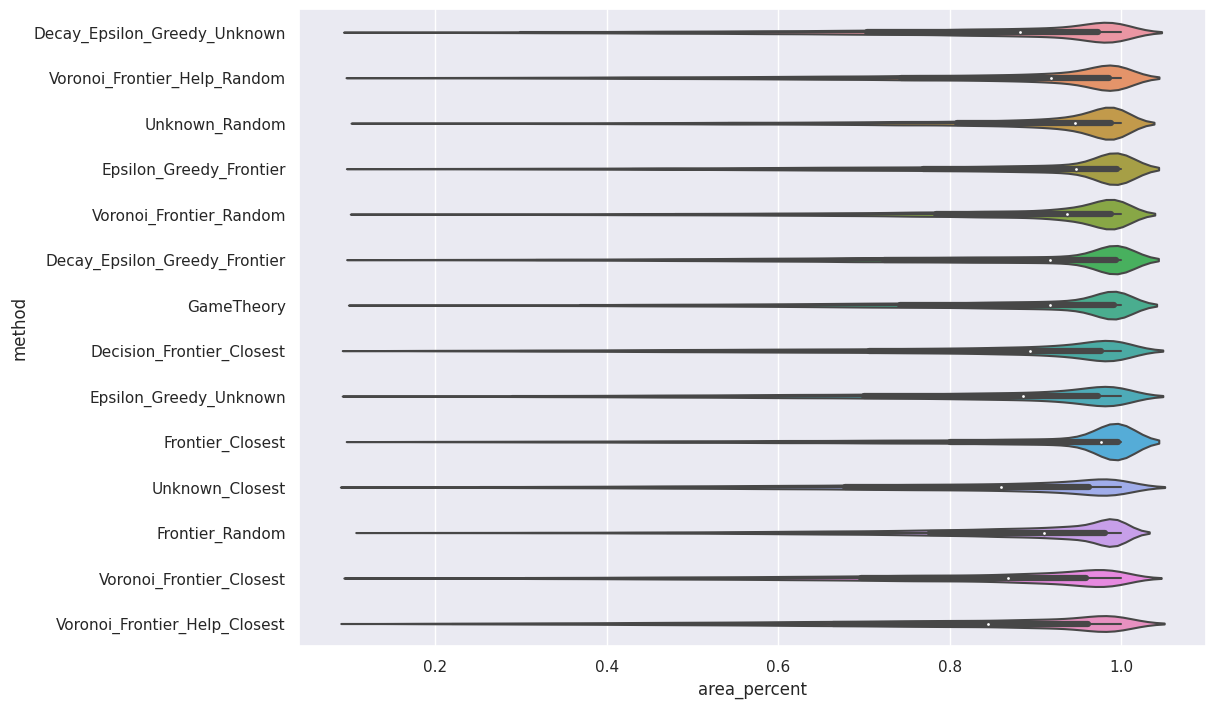

In [13]:
# sns plot of area_percent
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.violinplot(x="area_percent", y="method", data=all_df)

<AxesSubplot:xlabel='frame_count', ylabel='area_percent'>

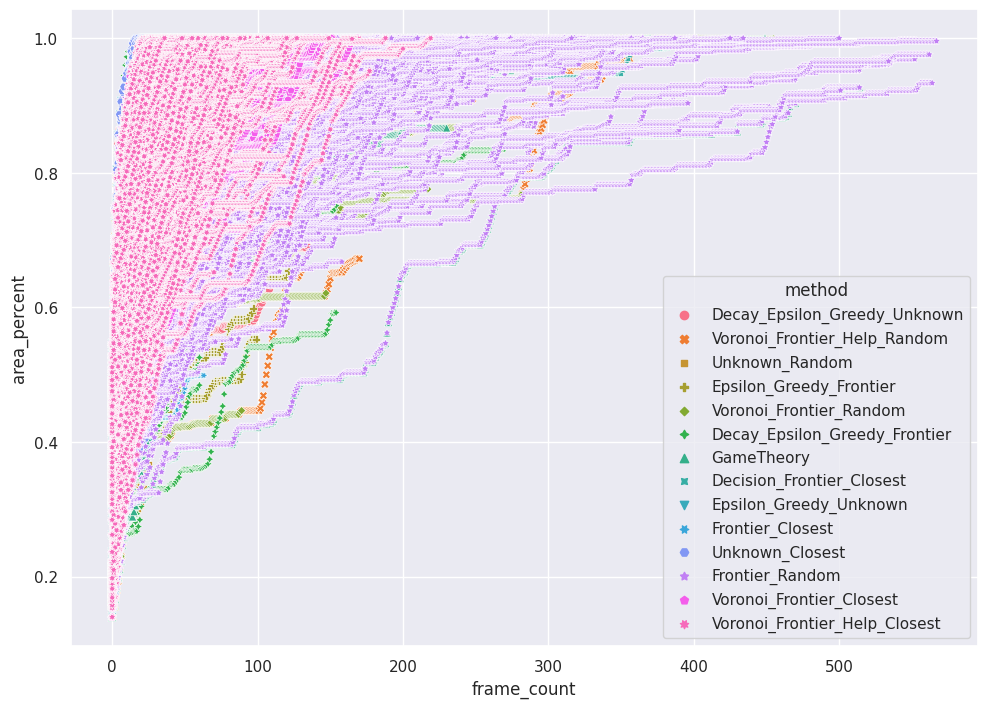

In [14]:
# y axis is the area_percent and the x axis is the frame_count, and the hue is the method
sns.scatterplot(data=all_df, x="frame_count", y="area_percent", hue="method", style="method")

Decay_Epsilon_Greedy_Frontier   271
Decay_Epsilon_Greedy_Unknown   284
Decision_Frontier_Closest   383
Epsilon_Greedy_Frontier   258
Epsilon_Greedy_Unknown   273
Frontier_Closest   263
Frontier_Random   568
GameTheory   515
Unknown_Closest   173
Unknown_Random   396
Voronoi_Frontier_Closest   170
Voronoi_Frontier_Help_Closest   220
Voronoi_Frontier_Help_Random   380
Voronoi_Frontier_Random   456


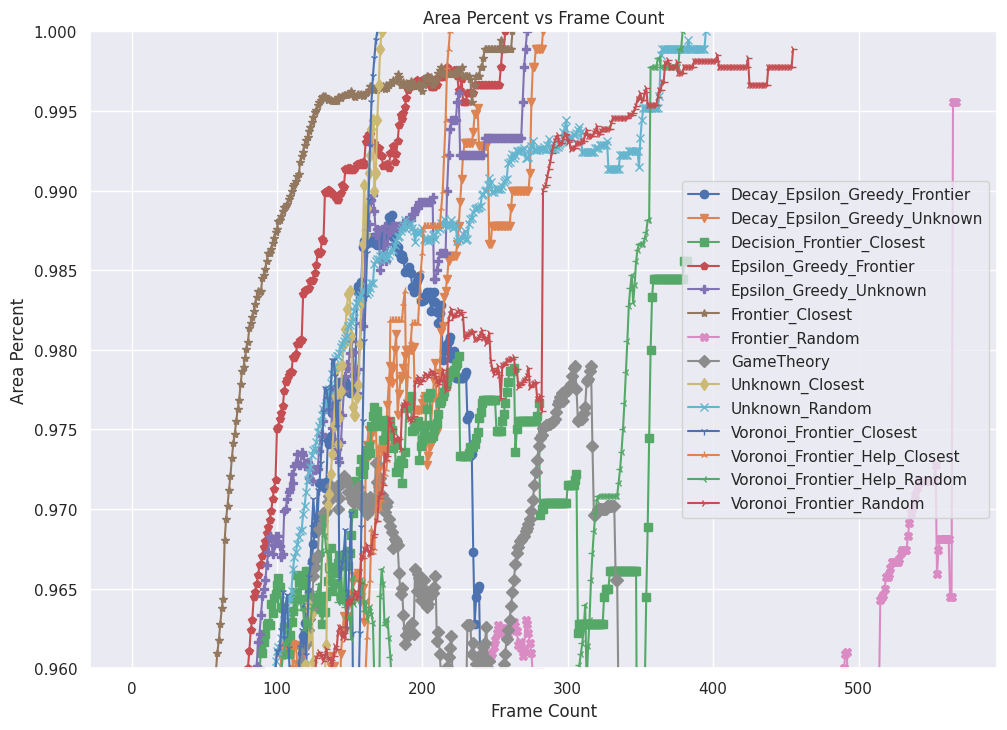

In [15]:
# create a unique marker for each method
markers = ['o', 'v', 's', 'p', 'P', '*', 'X', 'D', 'd', 'x', '1', '2', '3', '4', '8', 'h', 'H', '+', 'x', 'D', 'd', '|', '_']


for i,[method, group] in enumerate(all_df.groupby(['method'])):

    # group by 'frame_count' column
    count_group = group.groupby(['frame_count'])

    # plot mean of 'area_percent' against 'frame_count'
    # plt.plot( count_group['area_percent'].mean(), label=method, marker=markers[i])
    x_data =count_group['area_percent'].mean()
    # x_data[-1]
    print(method," ", len(x_data))
    # uniformy sample 1000 data points
    # x_data =count_group['area_percent'].mean().sample(n=1000, replace=True).sort_values()
    plt.plot( x_data, label=method, marker=markers[i])

plt.legend()

# set y range
plt.ylim(0.96, 1)
# make x axis log scale

# label the x axis
plt.xlabel('Frame Count')
# label the y axis
plt.ylabel('Area Percent')

# set the title
plt.title('Area Percent vs Frame Count')
# save the figure
plt.savefig(f"{root_directory}/data_analysis/plots/area_percent_vs_frame_count.png", dpi=300)

In [16]:
# The average frame_count for each method
all_df.groupby(['method']).max()['frame_count'].sort_values()

method
Voronoi_Frontier_Closest         169
Unknown_Closest                  172
Voronoi_Frontier_Help_Closest    219
Epsilon_Greedy_Frontier          257
Frontier_Closest                 262
Decay_Epsilon_Greedy_Frontier    270
Epsilon_Greedy_Unknown           272
Decay_Epsilon_Greedy_Unknown     283
Voronoi_Frontier_Help_Random     379
Decision_Frontier_Closest        382
Unknown_Random                   395
Voronoi_Frontier_Random          455
GameTheory                       514
Frontier_Random                  567
Name: frame_count, dtype: int64

In [17]:
all_df.groupby(['method'])['delta_time'].max()

method
Decay_Epsilon_Greedy_Frontier    6.76
Decay_Epsilon_Greedy_Unknown     7.93
Decision_Frontier_Closest        9.51
Epsilon_Greedy_Frontier          6.23
Epsilon_Greedy_Unknown           9.54
Frontier_Closest                 8.14
Frontier_Random                  9.37
GameTheory                       7.03
Unknown_Closest                  7.88
Unknown_Random                   8.10
Voronoi_Frontier_Closest         4.67
Voronoi_Frontier_Help_Closest    6.52
Voronoi_Frontier_Help_Random     5.39
Voronoi_Frontier_Random          8.53
Name: delta_time, dtype: float64

In [18]:
all_df.groupby(['method']).agg({'delta_time': np.ptp})

,delta_time
method,
Decay_Epsilon_Greedy_Frontier,6.75
Decay_Epsilon_Greedy_Unknown,7.93
Decision_Frontier_Closest,9.50
Epsilon_Greedy_Frontier,6.22
Epsilon_Greedy_Unknown,9.54
Frontier_Closest,8.14
Frontier_Random,9.37
GameTheory,7.03
Unknown_Closest,7.88


/tmp/ipykernel_2307321/2616091398.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.lineplot(data=group, x="frame_count", y="delta_time",err_style="bars", ci=68, label=method, )
/tmp/ipykernel_2307321/2616091398.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.lineplot(data=group, x="frame_count", y="delta_time",err_style="bars", ci=68, label=method, )
/tmp/ipykernel_2307321/2616091398.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.lineplot(data=group, x="frame_count", y="delta_time",err_style="bars", ci=68, label=method, )
/tmp/ipykernel_2307321/2616091398.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.lineplot(data=group, x="frame_count", y="delta_time",err_style="bars", ci=68, label=method, )
/tmp/ipykernel_2307321/2616091398.py:7: Futu

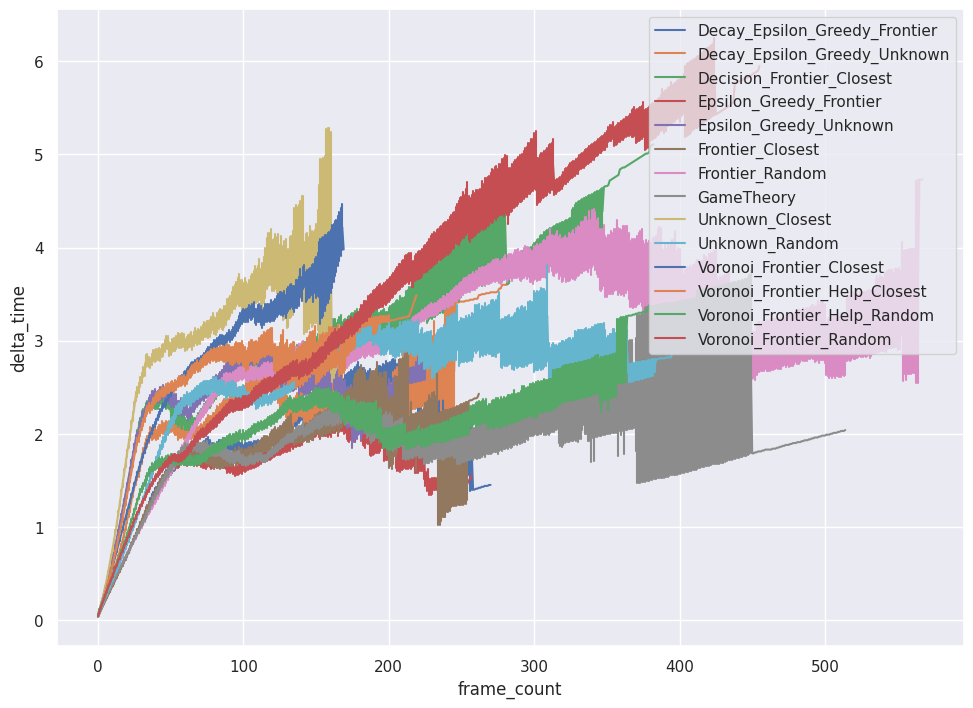

In [19]:
# all_df.groupby(['method'])
for i,[method, group] in enumerate(all_df.groupby(['method'])):
    # group by 'frame_count' column
    # plot mean of 'area_percent' against 'frame_count'
    # plt.plot( count_group['delta_time'].mean(), label=method, marker=markers[i])
    # plt.plot( np.arange(0, len(count_group['delta_time'])), count_group['delta_time'], label=method, marker=markers[i])
    sns.lineplot(data=group, x="frame_count", y="delta_time",err_style="bars", ci=68, label=method, )

plt.legend()



In [20]:
all_df['experiment_ID'].unique()

array([  30,    9,   10, ..., 7543, 7559, 7537])

In [21]:
# all_df.groupby(['method','experiment_ID'])
for i,[method, group] in enumerate(all_df.groupby(['method', 'experiment_ID'])):
    print("i: ", i, "method: ", method, "group: ", group.shape)
    # group by 'frame_count' column
    count_group = group.groupby(['frame_count'])
    # plot mean of 'area_percent' against 'frame_count' 
    # plt.plot( count_group['delta_time'].mean(), label=method, marker=markers[i])

i:  0 method:  ('Decay_Epsilon_Greedy_Frontier', 2700) group:  (180, 27)
i:  1 method:  ('Decay_Epsilon_Greedy_Frontier', 2701) group:  (144, 27)
i:  2 method:  ('Decay_Epsilon_Greedy_Frontier', 2702) group:  (150, 27)
i:  3 method:  ('Decay_Epsilon_Greedy_Frontier', 2703) group:  (145, 27)
i:  4 method:  ('Decay_Epsilon_Greedy_Frontier', 2704) group:  (161, 27)
i:  5 method:  ('Decay_Epsilon_Greedy_Frontier', 2705) group:  (113, 27)
i:  6 method:  ('Decay_Epsilon_Greedy_Frontier', 2706) group:  (146, 27)
i:  7 method:  ('Decay_Epsilon_Greedy_Frontier', 2707) group:  (142, 27)
i:  8 method:  ('Decay_Epsilon_Greedy_Frontier', 2708) group:  (98, 27)
i:  9 method:  ('Decay_Epsilon_Greedy_Frontier', 2709) group:  (120, 27)
i:  10 method:  ('Decay_Epsilon_Greedy_Frontier', 2710) group:  (129, 27)
i:  11 method:  ('Decay_Epsilon_Greedy_Frontier', 2711) group:  (143, 27)
i:  12 method:  ('Decay_Epsilon_Greedy_Frontier', 2712) group:  (161, 27)
i:  13 method:  ('Decay_Epsilon_Greedy_Frontier',